# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
df_imoveis = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

In [3]:
df_imoveis

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [4]:
y = df_imoveis['Valor_Aluguel']

In [5]:
X = df_imoveis[['N_Suites']]

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [6]:
poly_features = PolynomialFeatures(degree=2)

In [7]:
x_poly = poly_features.fit_transform(X)

In [8]:
x_poly

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       ...,
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  2.,  4.]])

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [10]:
# Aplicando regressão linear nos dados transformados
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de x_test: (1441, 3)
Tamanho de y_test: (1441,)


# 4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

c:\Users\emers\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


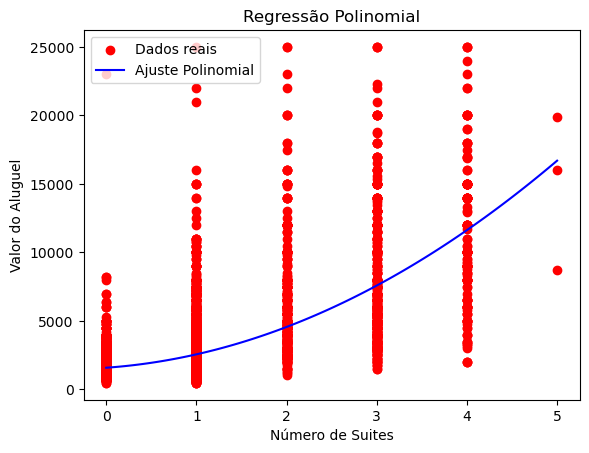

In [13]:
y_pred = model.predict(x_test)

# CriarEmos uma sequência de valores X para a visualização, buscando a suavização
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Número de Suites')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [14]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

R² da Regressão Polinomial: 0.3885


Com um R² de 0,38, podemos afirmar que o modelo utilizando a variável número de suítes consegue explicar apenas 38% da variância dos dados. Esse valor relativamente baixo pode ser justificado pela multicolinearidade entre as variáveis número de suítes e número de banheiros, conforme visto em aula.

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [18]:
poly_features = PolynomialFeatures(degree=4)

In [19]:
x_poly = poly_features.fit_transform(X)

In [20]:
x_poly

array([[  1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.],
       ...,
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.],
       [  1.,   2.,   4.,   8.,  16.]])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [22]:
# Aplicando regressão linear nos dados transformados
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de x_test: (1441, 5)
Tamanho de y_test: (1441,)


c:\Users\emers\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


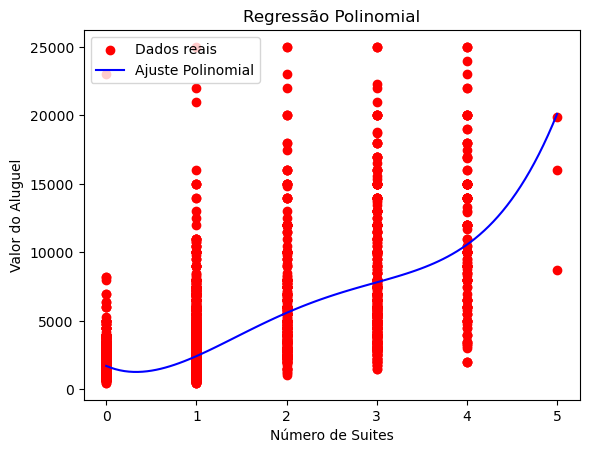

In [24]:
y_pred = model.predict(x_test)

# CriarEmos uma sequência de valores X para a visualização, buscando a suavização
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')  # Dados reais
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  # Linha do ajuste
plt.xlabel('Número de Suites')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [25]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

R² da Regressão Polinomial: 0.4130


Houve sim uma melhora no R² que foi de 0,38 para 0,41. Isso mostra que ao usar um polinômio de grau maior o modelo consegue explicar melhor a relação não linear entre a variável número de suítes e a variável target, prevendo um pouco melhor em relação ao modelo anterior.

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

Podemos dizer que o ElasticNet, Ridge e Lasso são técnicas utilizadas para melhorar os modelos de aprendizado de máquina, sendo normalmente aplicadas para tratar problemas de multicolinearidade e prevenir o overfitting. O Ridge (L2) não zera coeficientes, apenas os diminui, elevando-os ao quadrado. Isso ajuda a reduzir o risco de overfitting e melhora a capacidade de generalização do modelo, tornando-o mais robusto para novos dados. Já o Lasso (L1) pode zerar coeficientes, pois utiliza o valor absoluto deles como penalização. Ele não só reduz o risco de overfitting, mas também realiza a seleção de variáveis, eliminando aquelas que não são importantes ou relevantes para o modelo. Por fim, temos o ElasticNet (L1 + L2), que é uma abordagem mais equilibrada, pois combina o Ridge e o Lasso. Ele pode tanto reduzir quanto zerar coeficientes, dependendo do comportamento dos dados, melhorando a performance geral do modelo e ajudando a lidar com situações em que há muitas variáveis correlacionadas ou quando o número de variáveis é muito grande em relação ao número de observações.